Estudo de Regressão Linear baseado na discussão realizada no Clube de Assinaturas do instagram Universidade dos Dados.
# Regressão Linear

Pra que ser a regressão linear (RL)?

De forma breve, a regressão linear é uma metodologia estatística que serve para descobrir o impacto de uma variável em outra de forma causal.
Algumas perguntas que poderiam ser respondidas com a correta aplicação de uma regressão linear:
- Aumentar as horas de estudo aumenta o desempenho do aluno em notas? 
    / Relação da variável horas de estudos e a nota do aluno /
- Quanto cada ano de estudo impacta na minha renda futura?
    / Relação da variável anos de Estudo e Salário /
    * Importante salientar que mais de uma variável pode ser utilizada, neste exemplo, outra variável poderia ser a área de atuação.
    > Será que um ano adicional de estudos para jogadores de futebol tem o mesmo impacto na renda que um ano adicional para ser um Administrador de Empresas? -> Óbvio que não, porém para profissões um pouco mais comparáveis como Psicólogo e Professor de Matemática pode gerar insights interessantes.


## Como a regressão linear funciona?

Da forma mais simples, a regressão linear funciona calculando médias entre grupos onde os coeficientes são a diferença entre as médias dos grupos.

*Ué, se é assim, porque utilizar a regressão e não só calcular estas médias?*

A resposta é que a regressão utiliza um método diferente que literalmente minimiza o erro. Ou seja, ela calcula uma reta no qual o somatório ao quadrado de cada ponto de dados para a reta é o mínimo possível. E tem a possibilidade de fazer isso para inúmeras variáveis.

Vamos ver um exemplo:

Text(0.5, 1.0, 'Relação entre duas Variáveis Aleatórias')

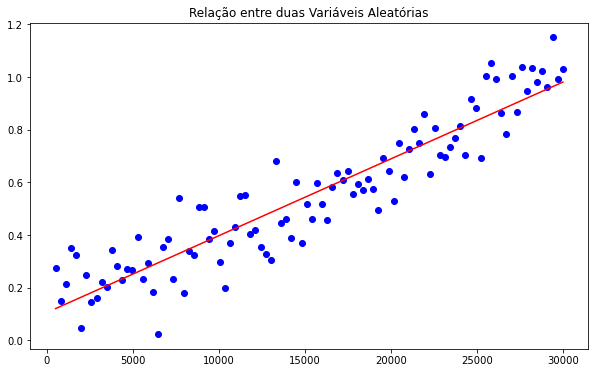

In [35]:
import warnings
warnings.filterwarnings("ignore", message="kurtosistest only valid for n>=20") # Não tem impacto no objetivo do notebook.

import matplotlib.pyplot as plt
import numpy as np

# criando os valores para o eixo x e o eixo y
x = np.linspace(500,30000,100)

# Adicionando um ruído aleatório em y
np.random.seed(0)
noise = np.random.normal ( 0,0.1, size = len(x))
y = np.linspace(0.1,0.99,100) + noise

# Ajuste de uma reta aos dados
coefficients = np.polyfit(x, y, deg=1)
poly = np.poly1d(coefficients)
y_fit = poly(x)


plt.figure(figsize = (10,6))
plt.scatter(x,y, color = 'blue')
plt.plot(x, y_fit, color='red', label='Reta de ajuste')
plt.title("Relação entre duas Variáveis Aleatórias")



# Notação Matemática

Beleza, mas como é a cara de uma regressão linear?

Podemos enxergar a regressão linear de duas maneiras :
 - Formato padrão:
  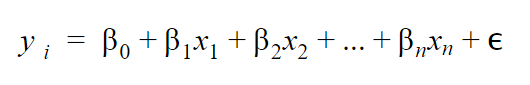
 
 Vantagens :  Mais simples de entender
 
 - Formato em Matriz:
 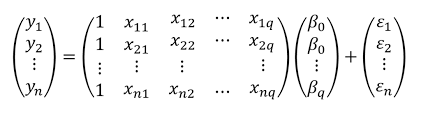
 
 Vantagens : Mais fácil de derivar os coeficientes.
 
 
 De forma geral, cada Betha significa o impacto da mudança de uma variável xi na nossa variável de interesse e o ε é o nosso termo de erro, ou seja, a diferença entre o valor y real de cada elemento da amostra e o nosso y calculado via regressão.
 
 *Ponto interessante: Se cada Betha é a relação ao se mudar x em y, o que é betha zero (intercepto)?*
 
 Basicamente, como eu disse lá em cima, calcular regressão é calcular diferença entre as médias, porém, o betha zero é um caso a parte.
 
 Supondo que estamos calculando a relação que o Primeiro Ano de estudos tem sobre o salário de um indivíduo.

In [36]:
import numpy as np
import pandas as pd
import statsmodels.api as sm


anos_estudo = np.array([0,0,0,0,0,1,1,1,1,1]) # Variável independente
salario = np.array([500,600,550,400,1000,700,800,300,900,900]) # Variável dependente

X_sm = sm.add_constant(anos_estudo)
# Calculando regressão entre anos_estudo = X e Salário = y
resultados = sm.OLS(salario,X_sm).fit()

# mostrando as estatísticas do modelo
resultados.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                 -0.056
Method:                 Least Squares   F-statistic:                    0.5261
Date:                Sat, 08 Jul 2023   Prob (F-statistic):              0.489
Time:                        18:33:18   Log-Likelihood:                -67.871
No. Observations:                  10   AIC:                             139.7
Df Residuals:                       8   BIC:                             140.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        610.0000    107.238      5.688      0.000     362.709     857.291
x1           110.0000    151.658      0.725      0.489    -239.723     459.723
==============================================================================
Omnibus:                        0.422   Durbin-Watson:                   2.572
Prob(Omnibus):                  0.810   Jarque-Bera (JB):                0.054
Skew:                          -0.136   Prob(JB):                        0.973
Kurtosis:                       2.764   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Encontramos que o Coeficiente é 110 que significa que um ano a mais de estudo aumenta sua renda em 110.
Sendo nossa equação de regressão linear : 
Salário = 610 + 110 * Anos de estudo

In [21]:
#Convertendo em dataframe para facilitar
data = {"anos_estudo" : anos_estudo,"salario":salario}
df = pd.DataFrame(data)

# Calculando média daqueles que possuem anos de estudo iguais a zero

anos_estudo_0 = df[df['anos_estudo'] == 0].mean()

#calculando média daqueles que possuem 1 ano de estudo
anos_estudo_1 = df[df['anos_estudo'] == 1].mean()

diferenca = anos_estudo_1['salario'] - anos_estudo_0['salario']

print (f"Média salarial de quem não possui ano de estudo: {anos_estudo_0['salario']}")
print (f"Média salarial de quem não possui ano de estudo: {anos_estudo_1['salario']}")
print(f'Aumento de salário médio para o primeiro ano de estudo: {diferenca}')


Média salarial de quem não possui ano de estudo: 610.0
Média salarial de quem possui um ano de estudo: 720.0
Aumento de salário médio para o primeiro ano de estudo: 110.0


Como podemos ver, a diferença entre as médias de quem possui e não possui um ano de estudo é igual ao nosso coeficiente da regressão linear. Assim, o nosso intercepto é a média do nosso grupo "controle", ou seja, aqueles que não tem a característica que estamos relacionando com nossa variável de interesse (Neste caso o salário).

### Beleza, mas então é só calcular uma regressão que tenho todas as respostas do universo?

Não é bem assim. A ideia da regressão linear é simular um teste de controle randomizado que é basicamente pegar um grupo de pessoas com caracteristicas similares, separa-las em grupos e depois aplicar um tratamento em um desses grupos pra ver se muda alguma coisa. A regressão "faz" isso porém com características e tratamentos que já ocorreram anteriormente. Ela separa a nossos dados em grupos comparáveis e calcula a média para cada grupo para encontrar os coeficientes a partir disso.

Daí surge a pergunta : E se nossos grupos não forem comparáveis? ou pior, se nosso grupo tiver um viés?

Existem algumas limitações do modelo de regressão linear, assim como algumas condições para que a relação entre médias que encontramos seja de fato uma relação causal e não apenas uma correlação. Porém abordarei apenas as mais relevantes.

**A primeira é a amostra aleatória.**

**A segunda é também óbvia, a relação entre as variáveis independentes e a dependente é linear**

$y = b_0 + b_1*x_1$

**A terceira premissa na análise de regressão é que o valor esperado do termo de erro ε seja zero**. Isso implica em algumas observações importantes. Primeiramente, significa que se tentássemos estimar um valor para o erro, a melhor suposição que poderíamos fazer seria (a média dos erros) zero. Essa suposição se baseia na ideia de que, em média, os erros são igualmente distribuídos acima e abaixo da reta de regressão.

No entanto, essa premissa também tem uma implicação interessante. Ela sugere que o termo de erro não possui um padrão sistemático dentro do conjunto de dados. Por exemplo, se ao calcularmos a regressão e analisarmos os termos de erro em toda a amostra, percebermos que eles apresentam um padrão distinto, isso pode indicar a presença de um viés na amostra (ou seja, alguma variável que influencia a variável de interesse está sendo omitida) ou que a própria amostra está enviesada.

No exemplo dado, consideramos a relação entre a quantidade de estudo e o salário de um grupo de indivíduos. Utilizando um modelo de regressão simples, poderíamos estimar uma reta de regressão para descrever essa relação. No entanto, se, ao analisar os resíduos (termos de erro) dessa regressão, identificarmos um padrão sistemático, como um aumento gradual ou uma variação periódica, isso poderia indicar a presença de uma variável omitida, como a experiência profissional, que também influencia o salário. Isso violaria a premissa de que o valor esperado do erro é zero.

**A quarta é a de ausência multicolinearidade.** Essa é um pouco mais simples porém muito mal interpretada. Basicamente é que a variação de uma variável independete (x1) não impacte muito em outra variável independente(x2). Por exemplo, se pegarmos o exemplo anterior de anos de estudo explicando salário e considerarmos uma terceira variável que mostre o grau de escolaridade dos pais, precisamos garantir que em nossa amostra não estamos considerando apenas filhos sem anos de estudo com pais que não tiveram anos de estudo, e compara-los com filhos que tem 1 ano de estudo com pais que também tiveram anos de estudo. 

**Homocedasticidade**. Ou, como eu gosto de pensar, a ausência de Heterocedasticidade. Mas o que significa isso?
A definição é que variância dos erros é constante para todos os níveis da variável independente. Uma explicação diz que os níveis de erros precisam ser similares para todos os pontos da amostragem, porém existe uma intuição por trás dessa lógica. Ela indica que o resultado da variável dependente de um elemento da amostra não impacta os outros elementos da amostra a atingirem o mesmo resultado. Por exemplo, se estamos querendo realizar duas avaliações:

1. A primeira é saber quais são os fatores que implicam em um aluno tirar determinada nota no vestibular.
2. A segunda é saber se o aluno passa no vestibular ou não.

A princípio a análise é parecida, na primeira estimamos quanto horas de estudo, classe social, escola, etc impactam na nota do aluno e com esse resultado, averiguamos na segunda avaliação se está acima ou abaixo da nota de corte, certo?
Na verdade não é assim que funciona, para a primeira análise, está tudo certo do ponto de vista da homocedasticidade pois um aluno tirar 800 no ENEM não impacta diretamente outro aluno a atingir a mesma nota. Porém, na segunda análise, dado que as vagas são limitadas, exemplo, se temos 20 vagas, os 20 primeiros alunos ao passar tiram a possibilidade de todos os outros de conseguir a suas vagas. Assim, esta é a diferença, na primeira análise temos homocedasticidade enquanto na segunda temos heterocedasticidade.


In [30]:
# Exemplo: 
anos_estudo = np.array([0,0,0,0,0,1,3,2,3,1]) # Variável independente
anos_estudo_pais = np.array([0,0,0,0,0,2,5,3,5,2]) # variável independete altamente correlacionada com os anos_estudo.
salario = np.array([500,600,550,400,1000,700,800,300,900,900]) # Variável dependente
data = {"anos_estudo" : anos_estudo, "anos_estudo_pais": anos_estudo_pais,"salario":salario}
df = pd.DataFrame(data)
# calculando correlação apenas para exemplificar
df.corr()

,anos_estudo,anos_estudo_pais,salario
anos_estudo,1.000000,0.995867,0.248108
anos_estudo_pais,0.995867,1.000000,0.299639
salario,0.248108,0.299639,1.000000


# Calculando VIF 
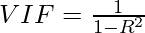
Para saber se existe multicolinearidade em seu conjunto de dados, aplique o indicador VIF ( Variance Inflation Factor)

In [31]:
#importando VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Variáveis independentes
X = df[['anos_estudo','anos_estudo_pais']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns

# calculando VIF para cada feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

#Printando resultado
print(vif_data)

            feature    VIF
0       anos_estudo  201.0
1  anos_estudo_pais  201.0


Um VIF de 201 é um valor inesperadamente alto, indicando a presença de multicolinearidade em nossa amostra. Isso sugere uma possível relação problemática entre as variáveis independentes relacionadas aos anos de estudo dos trabalhadores e aos anos de estudo de seus pais. No entanto, é necessário realizar uma análise mais aprofundada para entender melhor essa relação e possíveis vieses de seleção.

### Testando Homocedasticidade

Para testar se há homocedasticidade pode-se utilizar alguns testes estatísticos.
Os mais utilizados que também estão presentes na biblioteca statsmodels são o de **Goldfeld-Quandt**ou de **Breusch-Pagan**
Basicamente eles testam como hipótese nula a homocedastiticade a 5% de nível de significância.



In [32]:
#Importando biblioteca auxiliar
import statsmodels.stats.api as sms

In [34]:
# Dado seu modelo, y_fit

#y_previsto_train = sm.add_constant(y_previsto_train)
#sms.het_goldfeldquandt(residuo,y_previsto_train)

### Teste de Goldfeld-Quandt

**Objetivo**: O teste Goldfeld-Quandt é usado para verificar a presença de heterocedasticidade em um modelo de regressão.

**Método**: O teste divide a amostra em duas partes com base em uma variável independente relacionada à heterocedasticidade. Em seguida, compara as variâncias dos resíduos entre as duas partes.

**Interpretação**: Se a variância dos resíduos for significativamente diferente entre as duas partes da amostra, isso indica a presença de heterocedasticidade.

### Teste de Breusch-Pagan:

**Objetivo**: O teste Breusch-Pagan também é usado para detectar heterocedasticidade em um modelo de regressão.

**Método**: O teste calcula a relação entre os resíduos ao quadrado e as variáveis independentes relevantes e, em seguida, realiza um teste estatístico para verificar se há uma relação significativa.

**Interpretação**: Se o valor-p do teste Breusch-Pagan for menor que um nível de significância pré-definido, isso indica evidências de heterocedasticidade.


## Conclusão:

Assim, a regressão linear é uma ferramenta sensacional para averiguar a relação entre variáveis, principalmente para entender o impacto da variação de determinada característica em uma variável dependente **numérica e contínua**.

Cabe um adendo em diferenciar o uso da regressão linear para previsão e para inferência causal. No primeiro caso, apenas queremos entender a relação entre as variáveis para prever determinado resultado, assim, o rigor das premissas da regressão linear tem menor impacto, ou seja, podemos nos dar menos trabalho em ter certeza de que todas as premissas são atendidas. Já no segundo caso, é crucial que estejamos o mais próximos das premissas pois estamos mais preocupados na relação _entre_ as variáveis ao invés do valor de $y$.

Caso você tenha se interessado e quer saber mais sobre a regressão linear segue algumas recomendações:

Clube de Assinatura da Universiade dos dados : https://www.instagram.com/universidadedosdados/

Livro _Causal Inference : The Mixtape_ : https://mixtape.scunning.com/02-probability_and_regression#ordinary-least-squares

Livro _Causal Inference for the Brave and True_ : https://matheusfacure.github.io/python-causality-handbook/05-The-Unreasonable-Effectiveness-of-Linear-Regression.html

Livro _Introdução à Econometria: Uma abordagem Moderna- Jeffrey Wooldridge.


No Mais, Abraço!